In [1]:
import numpy as np
import random
import sys
from matplotlib import pyplot as plt

In [2]:

with open('../outputs/labels.txt', 'r') as f:
    classes = list(map(lambda s: s.strip(), f.readlines()))

In [3]:
sys.path.append("../sketchformer")

from basic_usage.sketchformer import continuous_embeddings
sketchformer = continuous_embeddings.get_pretrained_model()

[run-experiment] resorting checkpoint if exists
[Checkpoint] Restored, step #207536


In [4]:
def strokes_to_lines(sketch):
    X = []
    Y = []

    tmp_x, tmp_y = [], []
    sx = sy = 0
    for p in sketch:
        sx += p[0]
        sy += p[1]
        tmp_x.append(sx)
        tmp_y.append(-sy)
        if p[2] == 1:
            X.append(tmp_x)
            Y.append(tmp_y)
            tmp_x, tmp_y = [], []

    X.append(tmp_x)
    Y.append(tmp_y)

    return X, Y

63327
data class: airplane
[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz
predicted airplane
predicted airplane
predicted airplane
predicted airplane
predicted airplane
predicted airplane
68671
data class: apple
[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz
predicted apple
predicted apple
predicted apple
predicted apple
predicted apple
predicted apple
66787
data class: hot air balloon
[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz
predicted hot air balloon
predicted hot air balloon
predicted hot air balloon
predicted hot air balloon
predicted hot air balloon
predicted hot air balloon
58004
data class: banana
[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz
predicted banana
pre

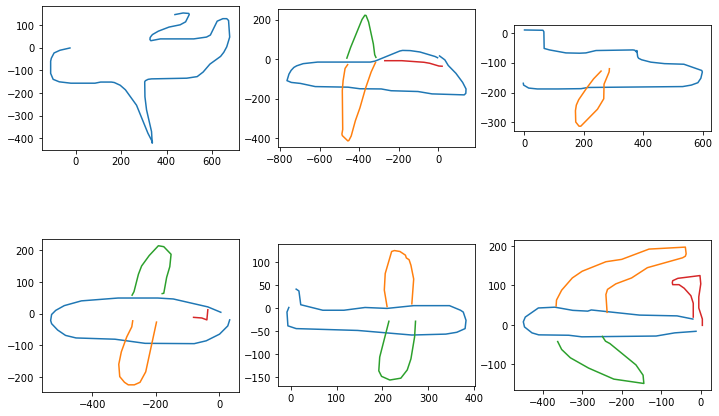

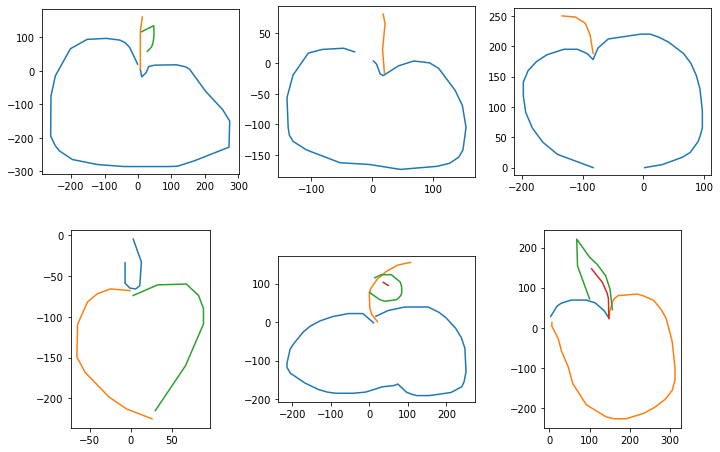

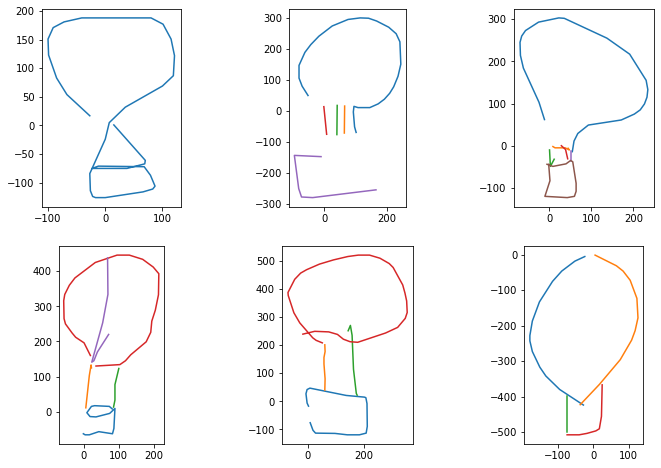

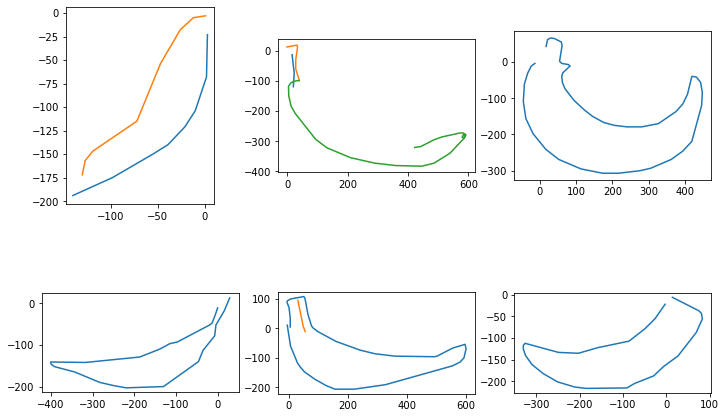

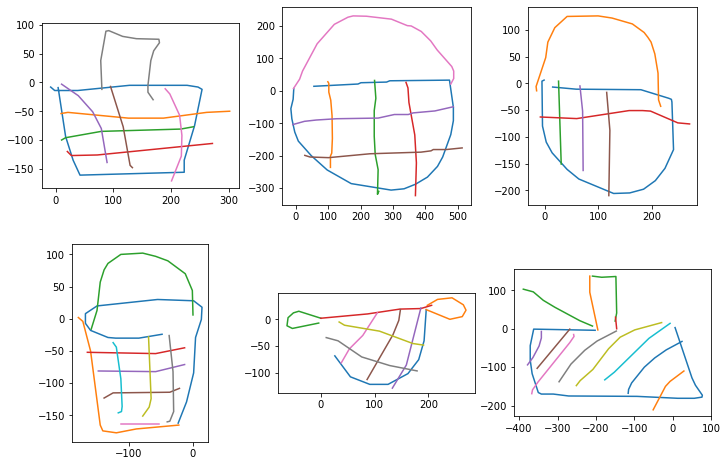

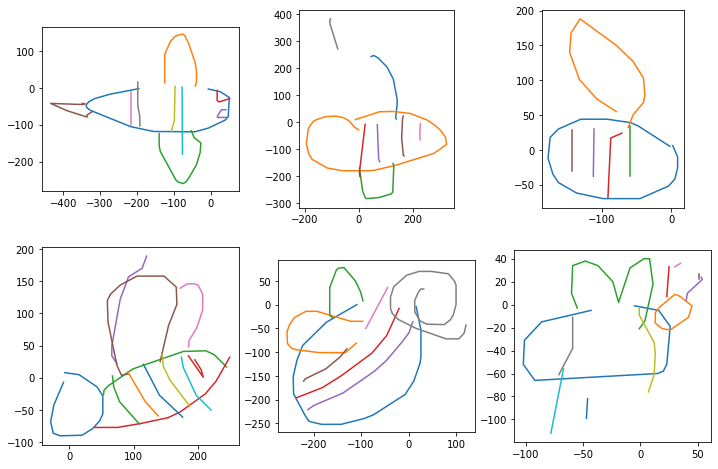

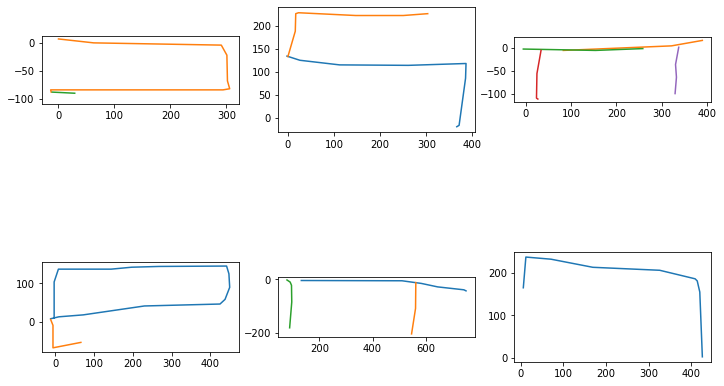

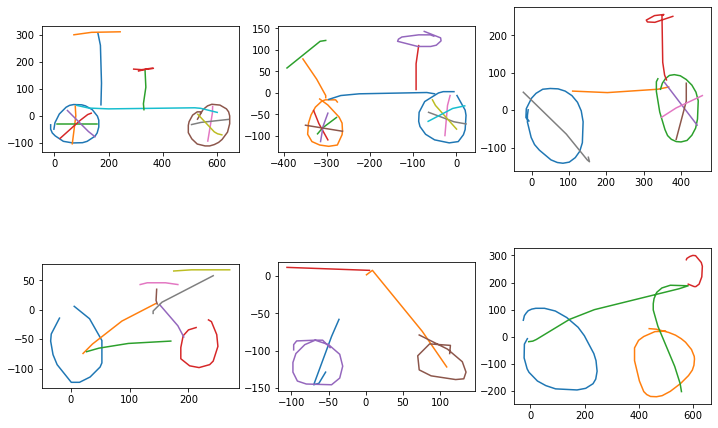

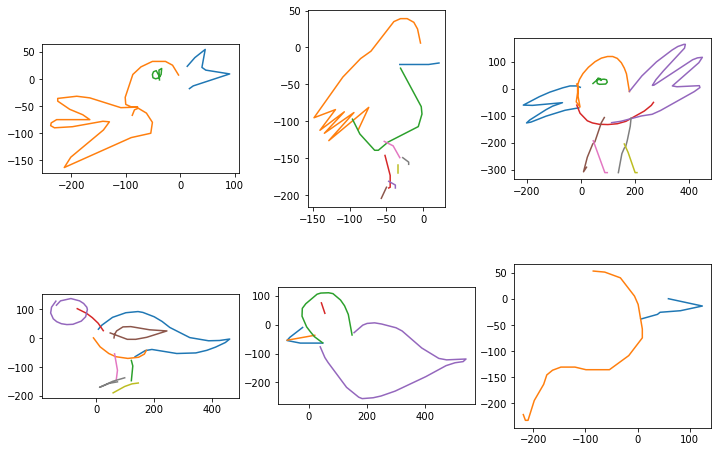

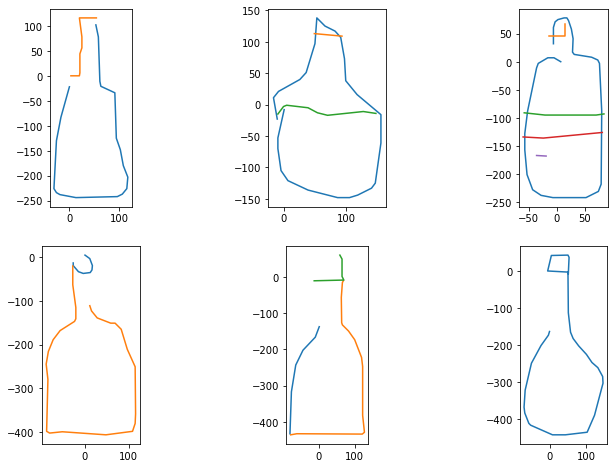

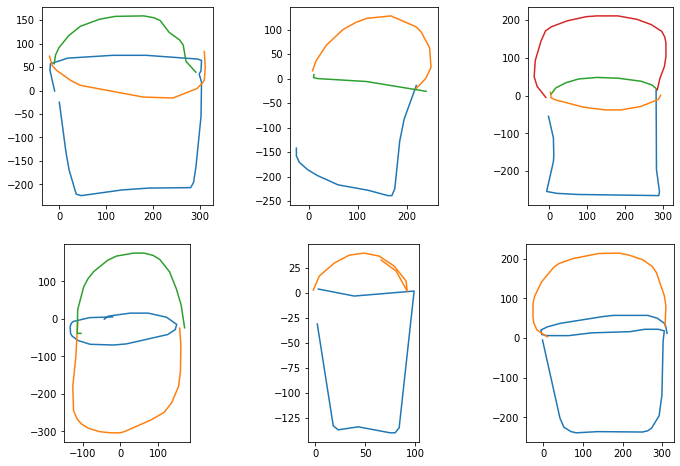

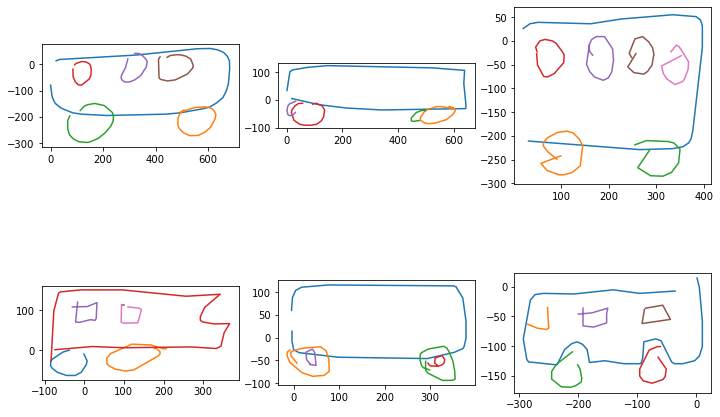

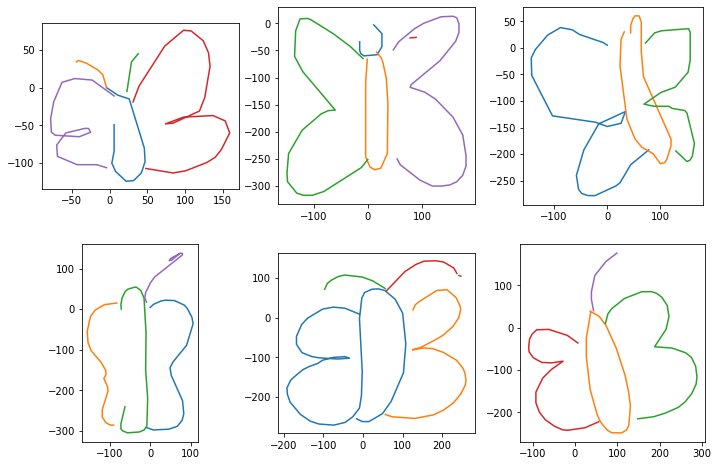

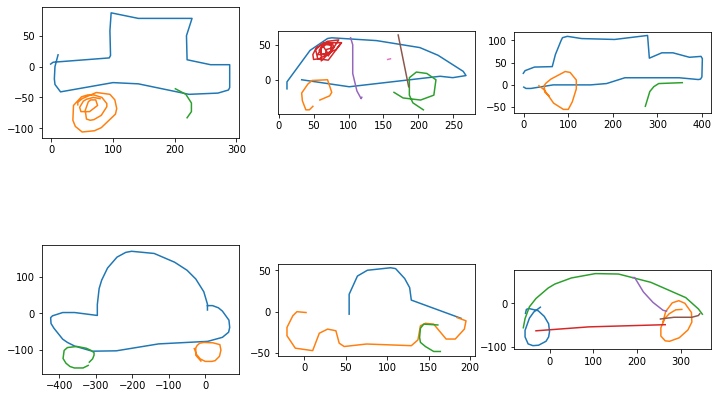

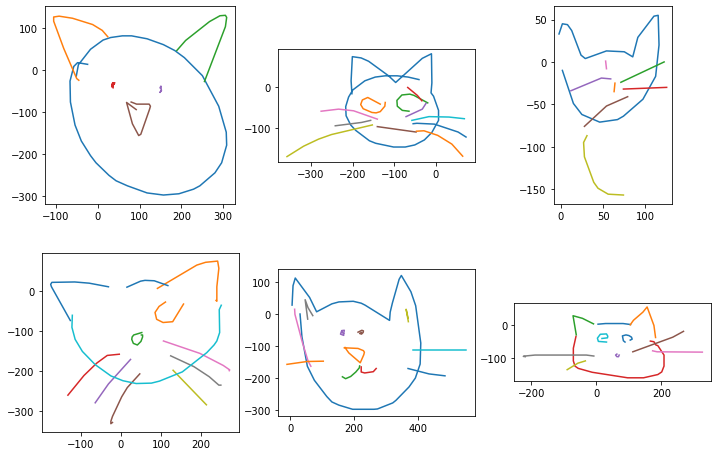

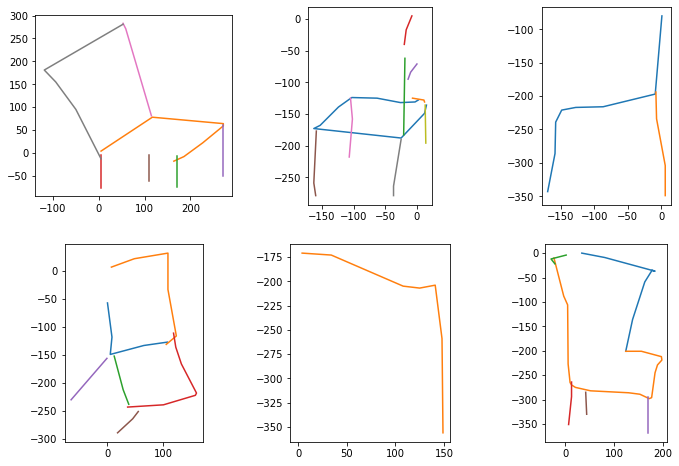

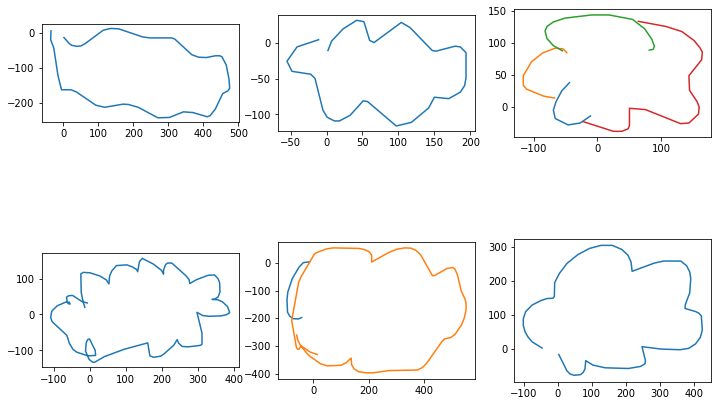

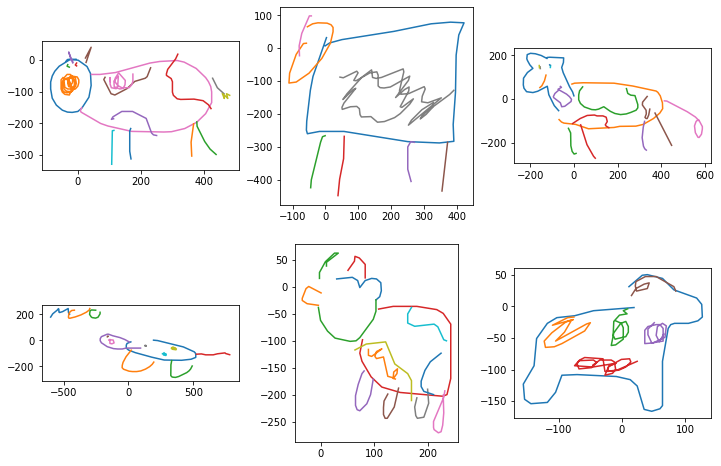

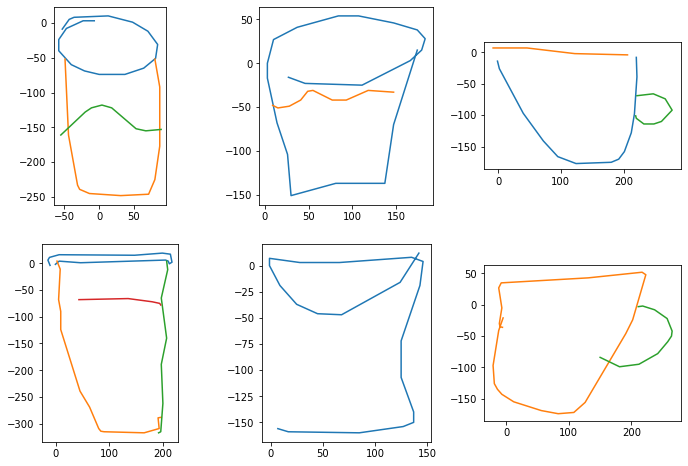

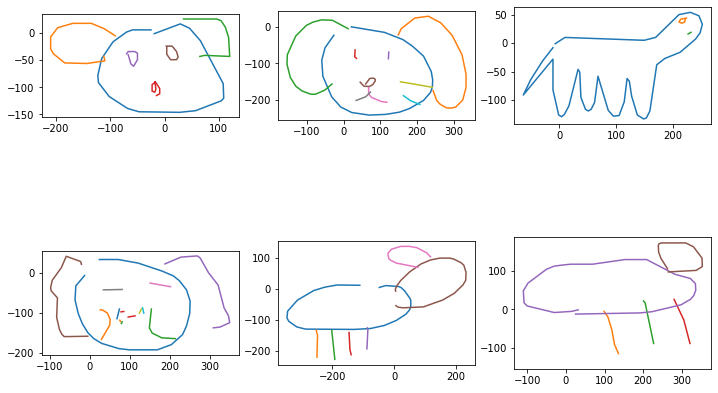

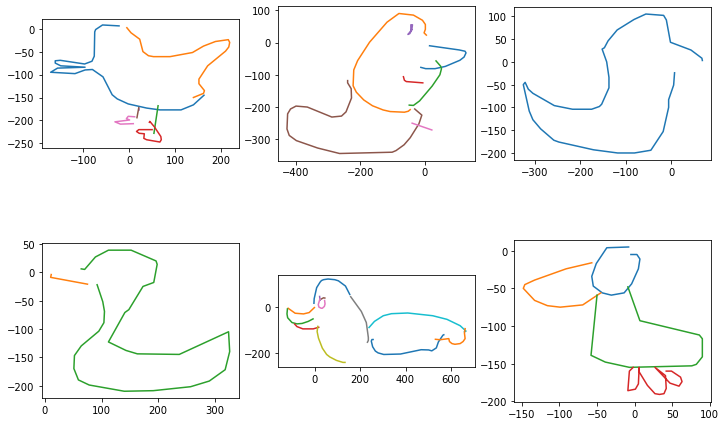

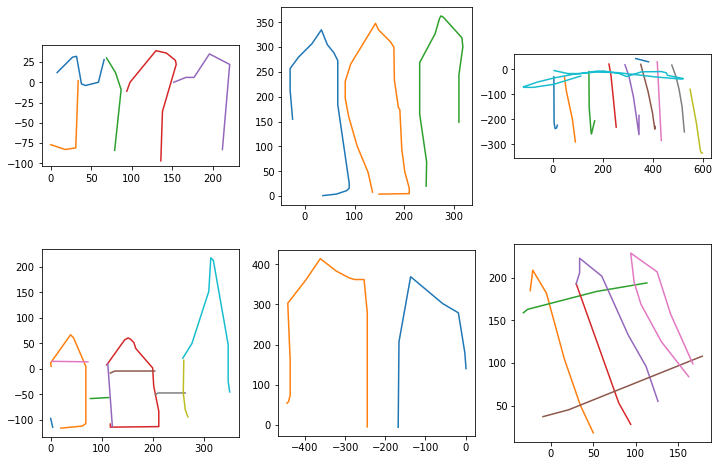

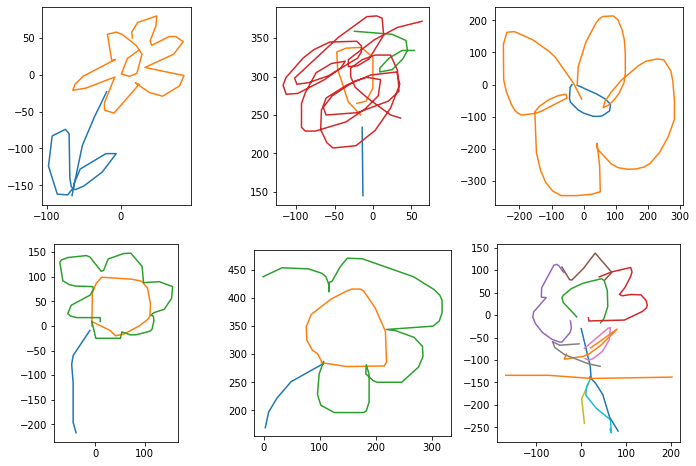

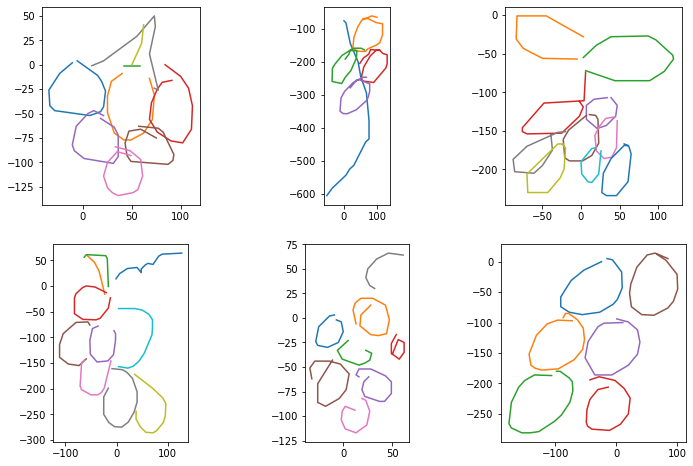

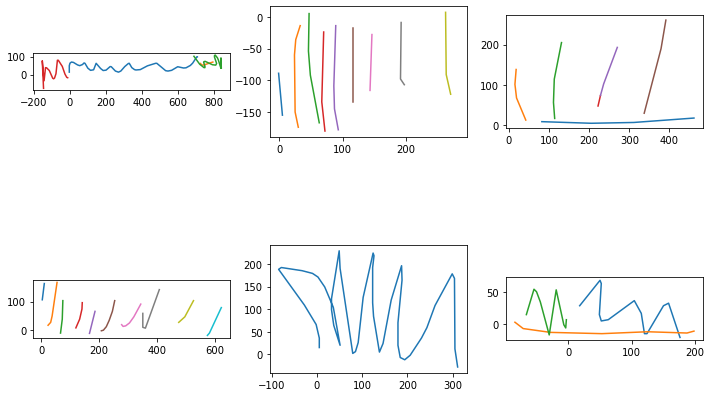

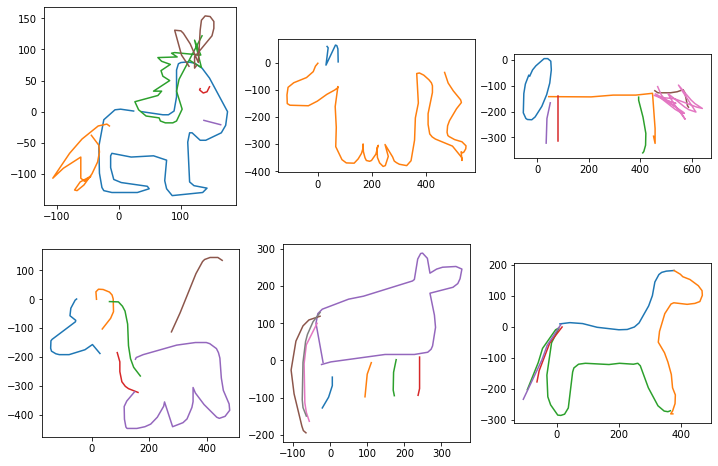

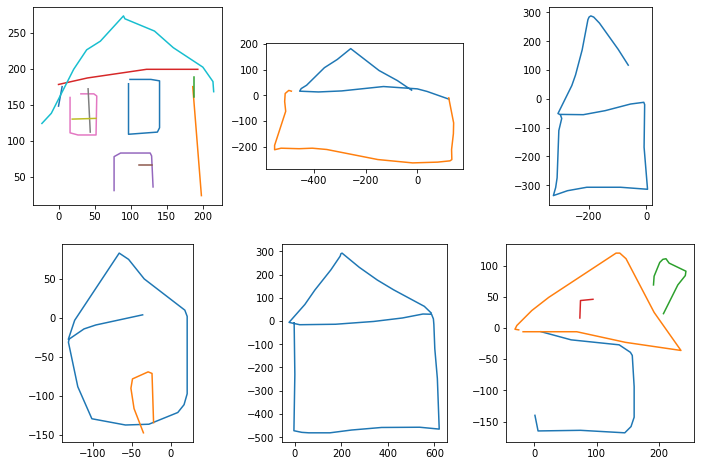

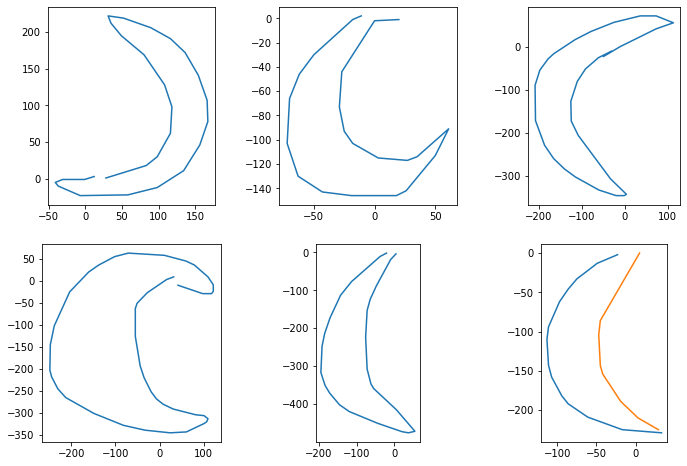

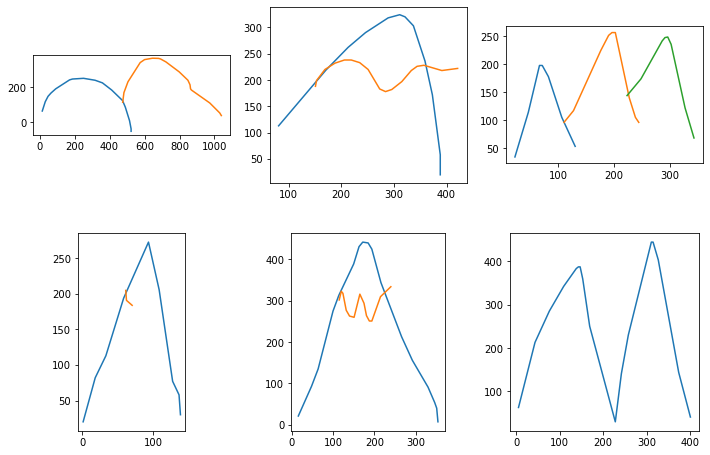

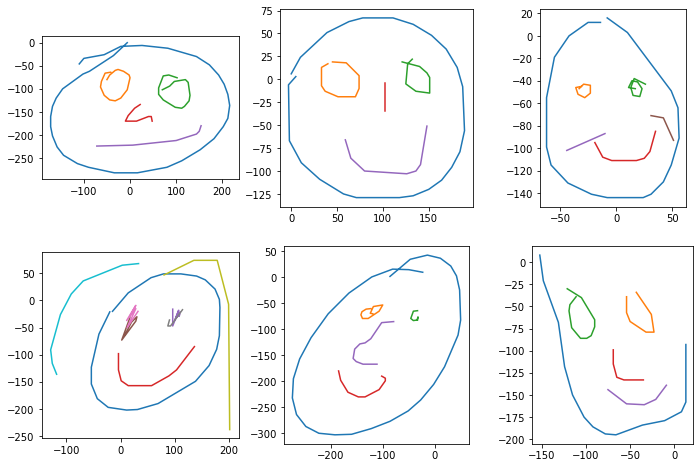

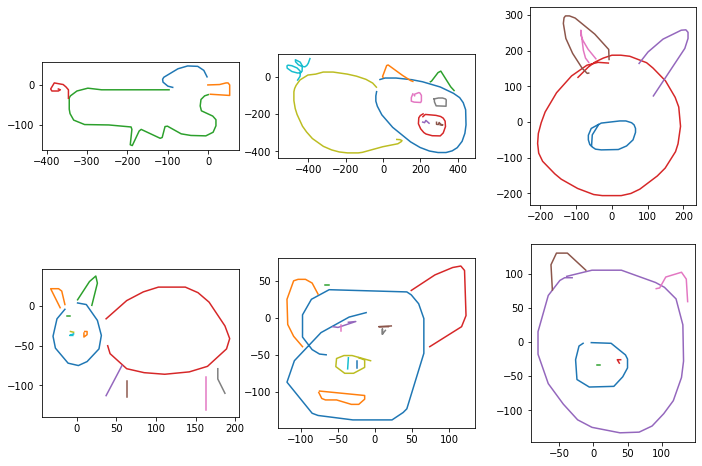

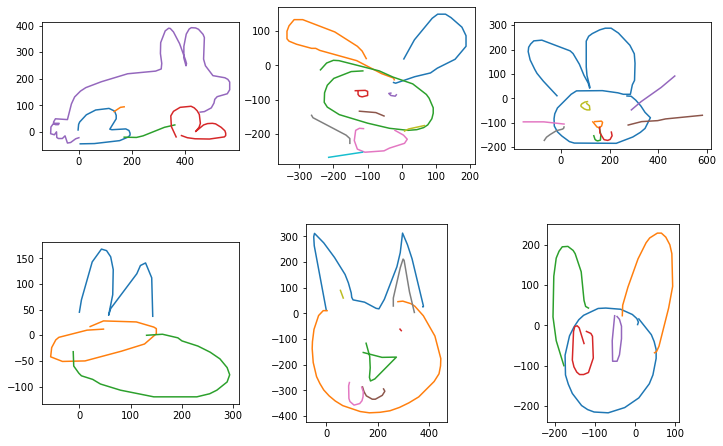

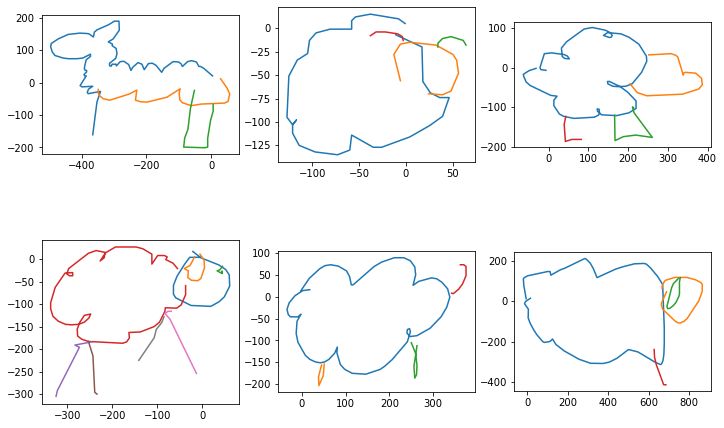

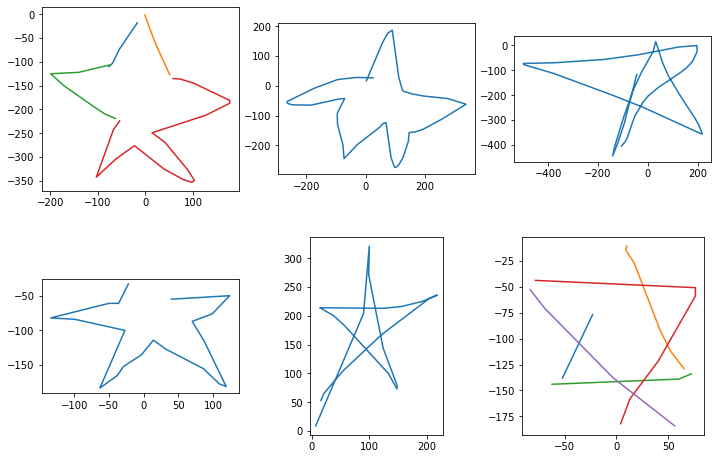

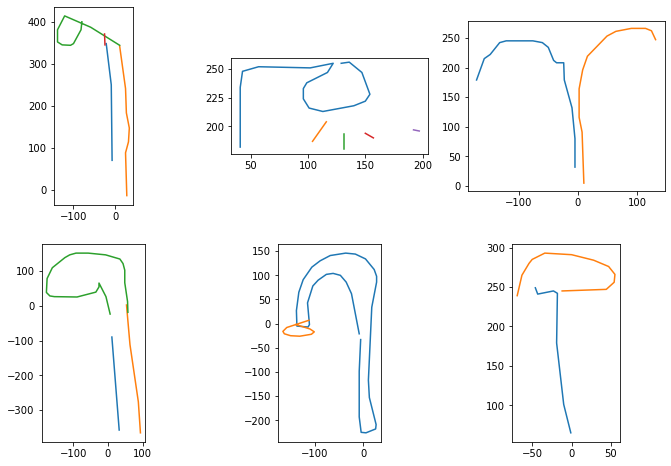

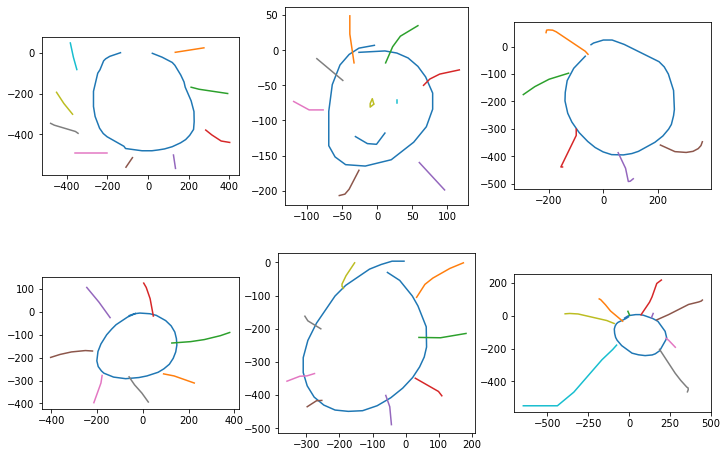

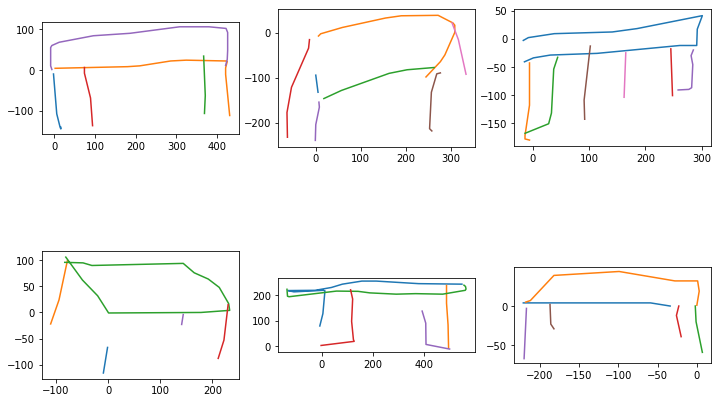

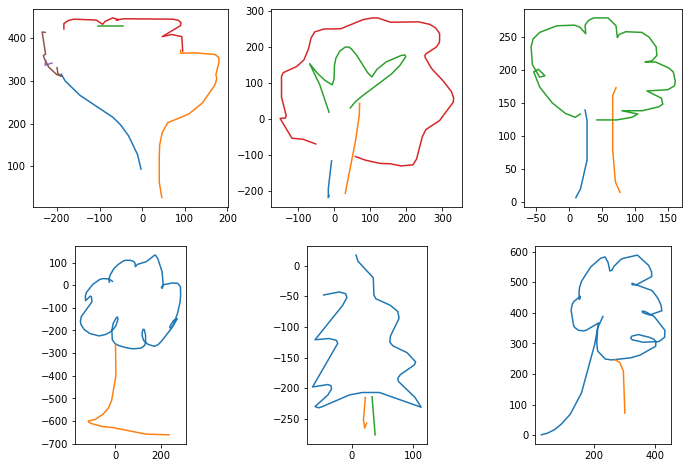

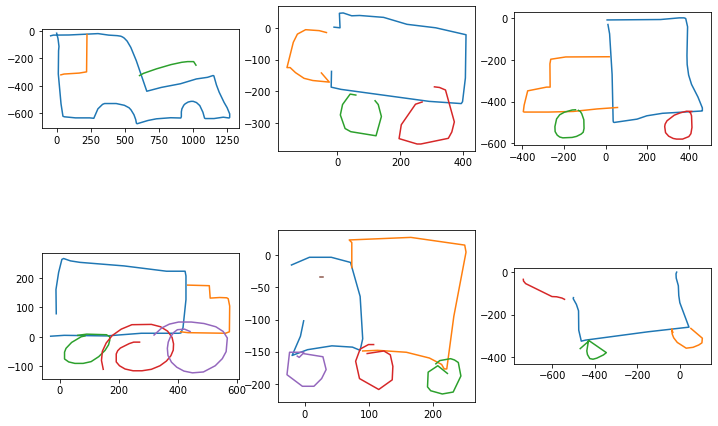

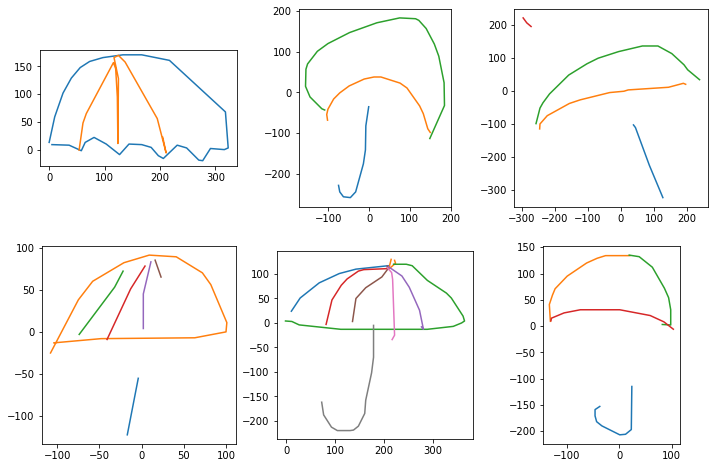

In [6]:
%matplotlib inline

N = 6
for name in classes:
    data = np.load(
        f'../data/quickdraw_filtered/{name}.npz', encoding='latin1', allow_pickle=True)["sketches"]
    print(len(data))

    print("data class:", name)
    sketches = random.sample(data.tolist(), N)
    preds = sketchformer.classify(sketches)
    fig = plt.figure(figsize=(12, 8))
    for i, (strokes, pred) in enumerate(zip(sketches, preds)):
        strokes = random.choice(data)
        print("predicted", pred)

        ax = fig.add_subplot(2, 3, i+1)
        X, Y = strokes_to_lines(strokes)
        for x, y in zip(X, Y):
            ax.plot(x, y)
        ax.set_aspect('equal')

    fig.show()